In [1]:
import numpy as np
import scipy as sp
import sympy as sm
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import matplotlib.pyplot as plt
sm.init_printing(use_unicode=True)
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# 1. Human capital accumulation

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [2]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [3]:
h_vec = np.linspace(0.1,1.5,100) 

# Define Labor as boolean
l = [0,1]

### Question 1.1:
*Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital).*

In [4]:
# i. Define utility in second period
def v2(l, h):
    
    # a. Define c
    if l == 0:
        c = b
    else:
        c = w*h*l
    
    # b. Define utility in second period
    utility = c**(1-rho)/(1-rho) - gamma*l
    
    return utility

In [5]:
# ii. Define function to solve for utility and labour for each level of human capital
def solve(period):
    
    # a. Define period and utility
    if period == 2:
        utility = v2
    elif period == 1:
        utility = v1

    # b. Define empty grids for h, v and l
    h_vec = np.linspace(0.1,1.5,100)
    v_vec = np.empty(100)
    l_vec = np.empty(100)

    # c. Solve for each h2
    for i,h in enumerate(h_vec):

        # d. Individual will only work if utillity when working > utility when not working
        v_vec[i] = max(utility(l[0],h), utility(l[1],h))
        l_vec[i] = utility(l[0],h) < utility(l[1],h)
        
    # e. Return values
    if period == 2:
        v2_vec = v_vec
        l2_vec = l_vec    
        return h_vec, v2_vec, l2_vec
        
    if period == 1:
        v1_vec = v_vec
        l1_vec = l_vec
        return h_vec, v1_vec, l1_vec

In [6]:
# iii. Extract solved values for period 2
h_vec,v2_vec,l2_vec = solve(2)

In [7]:
# iiii. Define fucntion that plots utility and labor function for a given period
def plot(period):
    
    # a. Period
    if period == 1:
        l_vec = l1_vec
        v_vec = v1_vec
    elif period == 2:
        l_vec = l2_vec
        v_vec = v2_vec
        
    # b. Set approprate style
    plt.style.use("bmh")
    
    # c. Define axis and plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(h_vec,l_vec)
    ax1.set_xlabel("$h_{}$".format(period))
    ax1.set_ylabel('$l_{}$'.format(period))
    ax1.set_title('$h_{}$ as a function of $l_{}$'.format(period, period))
    
    ax2.plot(h_vec,v_vec)
    ax2.set_xlabel('$h_{}$'.format(period))
    ax2.set_ylabel('$v_{}$'.format(period))
    ax2.set_title('$V_{}(h_{})$'.format(period, period))
    
    # d. Define cut-off point for which the individual will choose to work (l=1)
    cut_off = h_vec[np.where(l_vec==1)[0][0]]
    
    # e. Plot vertical line at cutoff point and make adjustments
    plt.axvline(x=cut_off, linestyle="--", ymin=0, ymax=0.85)
    plt.subplots_adjust(bottom=0.15, wspace=.25)
    
    plt.show()

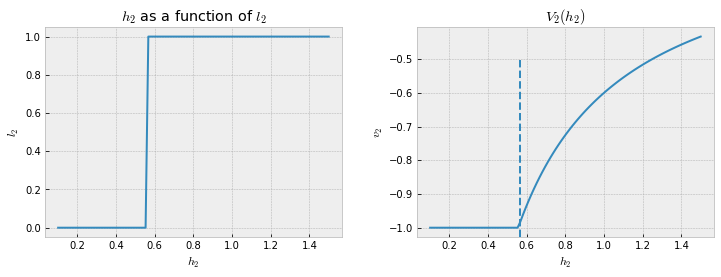

In [8]:
# iiiii. Call plots for period 2
plot(2)

In [9]:
# iiiiii. Define function that calculates the condition for l = 1
def cutoff(period):
    if period == 1:
        l_vec = l1_vec
    elif period == 2:
        l_vec = l2_vec
    
    cutoff = round(h_vec[np.where(l_vec==1)[0][0]], 2)
    
    print("l = 1 in period {}, if and only if h ≥ {}".format(period, cutoff))

In [10]:
# iiiiiii. Condition for l=1, in period 2
cutoff(2)

l = 1 in period 2, if and only if h ≥ 0.57


### Question 1.2:
*Solve the model in period 1 and illustrate the solution (including labor supply as a function of human capital).*

In [11]:
# i. interpolar, to be used for calculation of v2
v2_intpol = interpolate.RegularGridInterpolator((h_vec,), v2_vec, bounds_error=False,fill_value=None)

In [12]:
# ii. Define utility for period 1
def v1(l1, h1, intpol = v2_intpol):
    
    # a. Calculate expected value of 2, given v2 with and without stochastic gain
    exp_v2 = 0.5*(v2_intpol([h1 + l1])[0] + v2_intpol([h1 + l1 + Delta])[0])
    
    # b. Define c
    if l1 == 0:
        c = b
    else:
        c = w*h1*l1
    
    # c. Define Utility
    utility = c**(1-rho)/(1-rho) - gamma*l1  + beta*exp_v2
    
    return utility

In [13]:
# iii. Extract solved values for period 1
h_vec,v1_vec,l1_vec = solve(1)

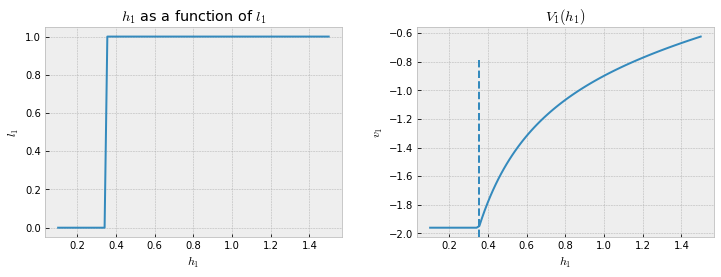

In [14]:
# iiii. Call plots for period 1
plot(1)

In [15]:
# iiiii. Condition for l=1, in period 2
cutoff(1)

l = 1 in period 1, if and only if h ≥ 0.35


### Question 1.3:
*Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.*

If the petential wage income for the worker is lower than the employment benefits she receives, b, then the worker will never chose to work, as she could receive the benefit of not working instead. This is especially true due to the disutility associated with working, $-\gamma l_2$. Thus the worker would never work.

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [16]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

#Define variables
# Define variables and parameters
alpha = sm.symbols("alpha")
b = sm.symbols("b")
gamma = sm.symbols("gamma")
h = sm.symbols("h")
phi = sm.symbols("phi")
pi = sm.symbols("pi_t")
pit = sm.symbols("pi_t-1")
pi_opt = sm.symbols("pi^opt")
s = sm.symbols("s_t")
st = sm.symbols("s_t-1")
v = sm.symbols("v_t")
y = sm.symbols("y_t")
yt = sm.symbols("y_t-1")
y_opt = sm.symbols("y^opt")

### Question 2.1:
*Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.*

In [17]:
# i. Define agregate demand (AD) and aggregate supply (AS)
ad = sm.Function("ad")
sras = sm.Function("sras")

ad_func = 1/(h*alpha)*(v-(1+b*alpha)*y)
sras_func = pit + gamma*y - phi*gamma*yt + s - phi*st

ad = sm.Eq(pi, ad_func)
sras = sm.Eq(pi, sras_func)

We can now solve for $\pi^{opt}$ and $y^{opt}$ and the result is as follows

In [18]:
# ii. Solving the with the first order condition
foc = sm.solve([ad, sras], [y, pi])

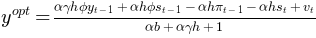

In [19]:
# iii. Y in equilibrium
y_foc = sm.Eq(y_opt, foc[y])
y_foc

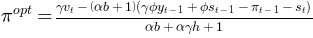

In [20]:
# iiii. Pi in equilibrium
pi_foc = sm.Eq(pi_opt, foc[pi])
pi_foc

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [21]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

### Question 3.1:
*Plot the histograms of the budget shares for each good across agents.*

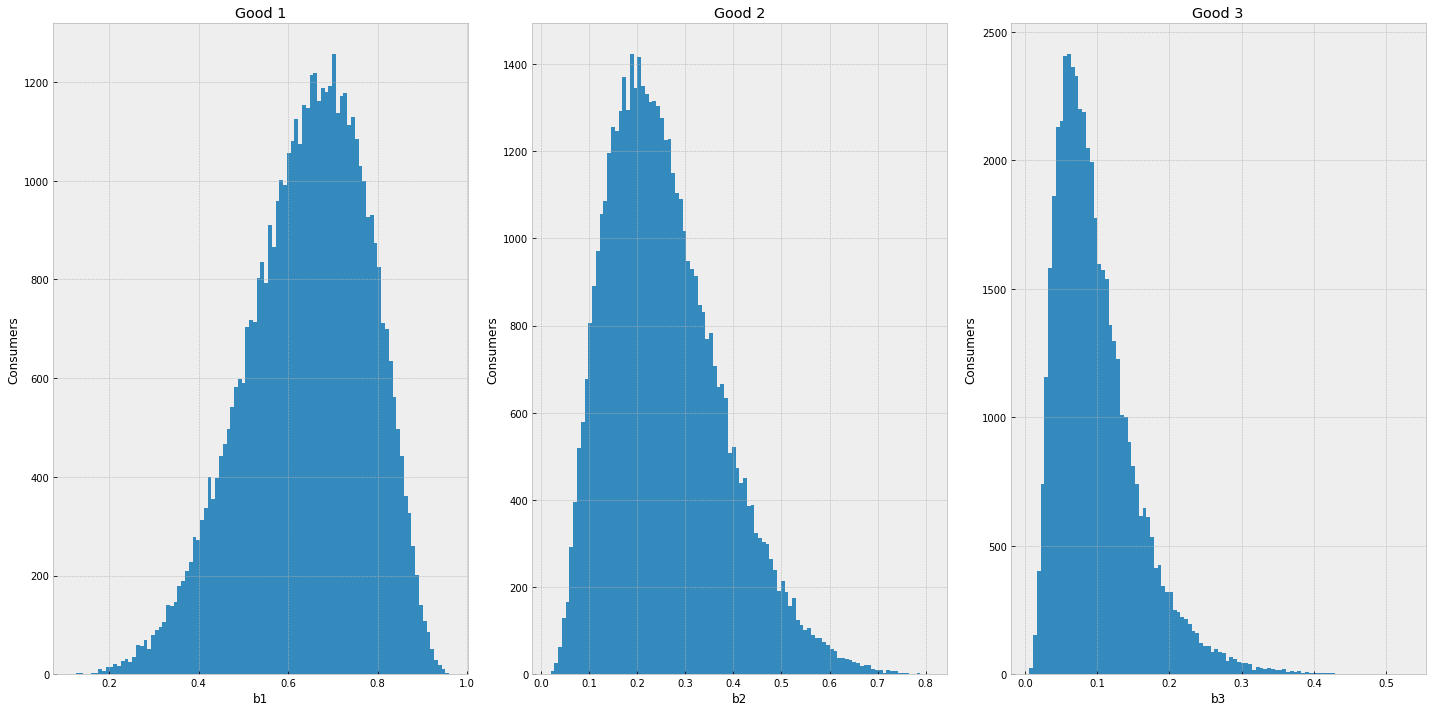

In [22]:
# i. Creating a list for our betas as b1, b2, b3
b1 = betas[:,0]
""" The above creates a list of the variable beta
"""
b2 = betas[:,1]
b3 = betas[:,2]

# ii. Plotting b1, b2, b3
fig=plt.figure(figsize=(20,10))
""" Initializing the figure and the size of it
"""

for i in [1,2,3]:
    """ Looping over i to create a plot for each beta
    """
    ax = fig.add_subplot(1,3,i)
    ax.hist(globals()['b%s' % i],bins=100);
    ax.set_xlabel('b%s' % i)
    ax.set_ylabel('Consumers')
    ax.set_title('Good '+str(i))
fig.tight_layout()

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

### Question 3.2:
*Plot the excess demand functions.*

In [23]:
# i. Creating the demand function for each good

def demand_1(p1,p2,e1,e2,e3,betas):
    """ Defining af function to calculate the demand for good 1
    """

    I = e1*p1 + e2*p2 + e3
    """ Defining income as specified in the assignment
    """
    return b1*I/p1

def demand_2(p1,p2,e1,e2,e3,betas):
    I = e1*p1 + e2*p2 + e3
    return b2*I/p2

def demand_3(p1,p2,e1,e2,e3,betas):
    I = e1*p1 + e2*p2 + e3
    return b3*I

In [24]:
# ii. Creating excess demand function

def excess_demand_1(p1,p2,e1,e2,e3,betas):
    """ Defining the excess function
    """
    excess_1 = np.sum(demand_1(p1,p2,e1,e2,e3,betas)) - np.sum(e1)
    """ excess = demand - supply
    """
    return excess_1

def excess_demand_2(p1,p2,e1,e2,e3,betas):
    excess_2 = np.sum(demand_2(p1,p2,e1,e2,e3,betas)) - np.sum(e2)
    return excess_2

def excess_demand_3(p1,p2,e1,e2,e3,betas):
    excess_3 = np.sum(demand_3(p1,p2,e1,e2,e3,betas)) - np.sum(e3)
    return excess_3

In [25]:
# iii.Plotting the excess demand function

p1_ = np.linspace(0.3,30,300)
p2_ = np.linspace(0.3,30,300)
""" Creating price vectors to be used for excess demand plot 
"""

p1_grid,p2_grid = np.meshgrid(p1_,p2_,indexing='ij')
""" Creating a grid for p1 and p2 
"""

excess_1_grid = np.empty((300,300))
""" Excess demand grid for plots
"""
excess_2_grid = np.empty((300,300))
excess_3_grid = np.empty((300,300))

for i,p1 in enumerate(p1_):
    for j,p2 in enumerate(p2_):
        """ Looping over both price sets to get excess demands for each good 
        """
        excess_1_grid[i,j] = excess_demand_1(p1,p2,e1,e2,e3,betas)
        excess_2_grid[i,j] = excess_demand_2(p1,p2,e1,e2,e3,betas)
        excess_3_grid[i,j] = excess_demand_3(p1,p2,e1,e2,e3,betas)

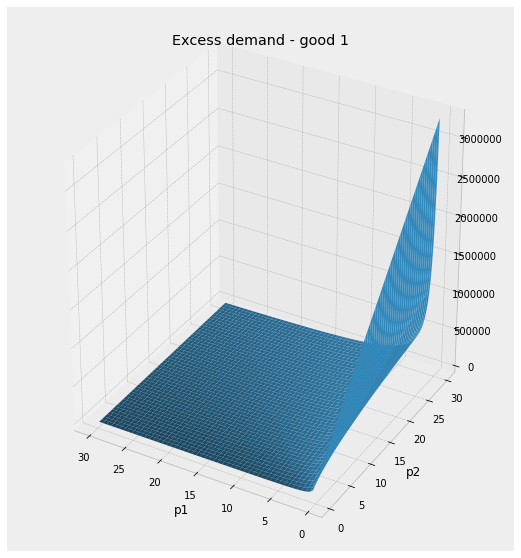

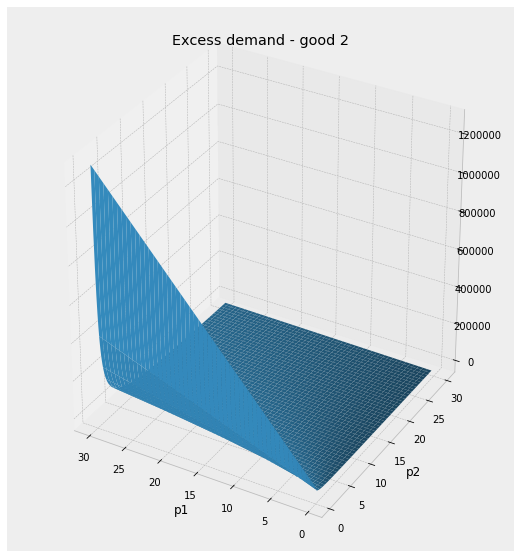

In [33]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(p1_grid, p2_grid, excess_1_grid)
ax.invert_xaxis()
ax.set_title('Excess demand - good 1')
ax.set_xlabel("p1")
ax.set_ylabel("p2")

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(p1_grid, p2_grid, excess_2_grid)
ax.invert_xaxis()
ax.set_title('Excess demand - good 2')
ax.set_xlabel("p1")
ax.set_ylabel("p2")
plt.show()

### Quesiton 3.3:
*Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:*

*1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.*

*2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.*

*3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.*

*4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.*

In [43]:
# i. Defining the Walras equilibrium function

def Walras_equilibrium(betas, p1, p2, e1, e2, e3, kappa=0.5, eps=1e-8, maxiter=50000):
        t = 0
        while True:

                # a. step 1: excess demand
                X1 = excess_demand_1(p1,p2,e1,e2,e3,betas)
                X2 = excess_demand_2(p1,p2,e1,e2,e3,betas)

                # b. step 2: stop
                if np.abs(X1) < eps and np.abs(X2) < eps or t >= maxiter:
                        print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {X1:14.8f}')
                        print(f'{t:3d}: p2 = {p2:12.8f} -> excess demand -> {X2:14.8f}')
                        break
                
                # c. step 3: update prices
                p1 = p1 + kappa*X1/betas.size
                p2 = p2 + kappa*X2/betas.size

                # d. step 4: return
                if t < 5 or t%2500 == 0:
                        print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {X1:14.8f}')
                        print(f'{t:3d}: p2 = {p2:12.8f} -> excess demand -> {X2:14.8f}')
                elif t == 5:
                        print(" ...")

                t += 1
        
        return p1, p2

In [44]:
# ii. Setting initial values to find equilibrium price

p1 = 1.4
p2 = 1
kappa = 0.1
eps = 1e-8

In [45]:
# iii. Using our function from part i. and initial values from part ii. to find equlibrium prices

p1_eq,p2_eq = Walras_equilibrium(betas,p1,p2,e1,e2,e3,kappa=kappa,eps=eps)
print("Equilibrium prices (p1,p2) = (6.49, 2.61)")

  0: p1 =   1.41865154 -> excess demand -> 27977.31151752
  0: p2 =   0.99608594 -> excess demand -> -5871.09387963
  1: p1 =   1.43684279 -> excess demand -> 27286.87384056
  1: p2 =   0.99241373 -> excess demand -> -5508.31164171
  2: p1 =   1.45459877 -> excess demand -> 26633.97026830
  2: p2 =   0.98897615 -> excess demand -> -5156.36947140
  3: p1 =   1.47194254 -> excess demand -> 26015.65971241
  3: p2 =   0.98576609 -> excess demand -> -4815.08645945
  4: p1 =   1.48889542 -> excess demand -> 25429.30968444
  4: p2 =   0.98277657 -> excess demand -> -4484.28325466
 ...
2500: p1 =   5.93849485 -> excess demand ->   550.18919081
2500: p2 =   2.41083774 -> excess demand ->   205.44544903
5000: p1 =   6.37746401 -> excess demand ->   104.64732030
5000: p2 =   2.57468743 -> excess demand ->    39.04621324
7500: p1 =   6.46580779 -> excess demand ->    22.23130435
7500: p2 =   2.60764817 -> excess demand ->     8.29385995
10000: p1 =   6.48477769 -> excess demand ->     4.82462641
1

### Question 3.4:
*Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

Mean:  2.376 and Variance:  0.208


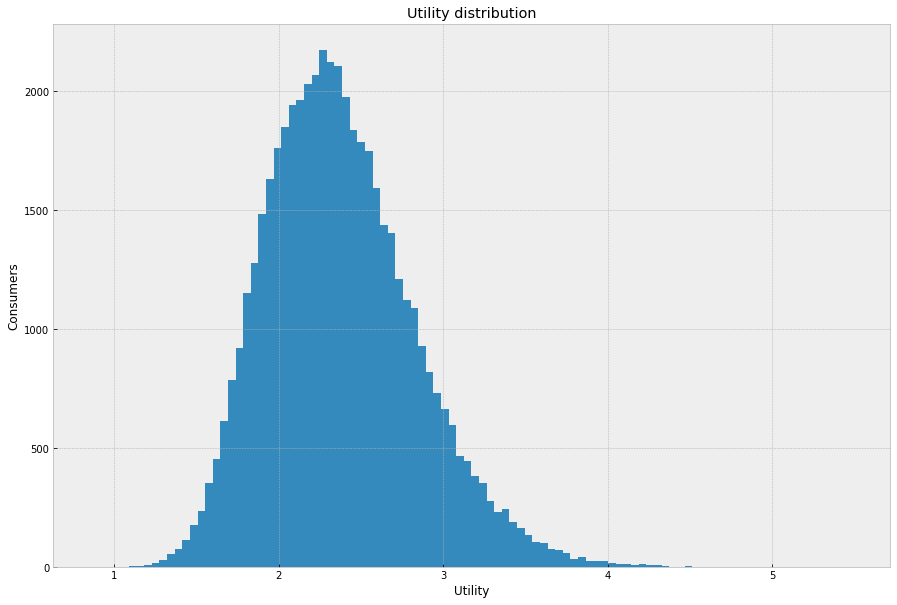

In [28]:
# i. Defining the utility function as u_func
def u_func(p1,p2,e1,e2,e3,betas,gamma):
        """ Creating the utility function
        """
        
        I = p1*e1 + p2*e2 + e3
        demand1 = b1*I/p1
        demand2 = b2*I/p2
        demand3 = b3*I
        """ Setting up inputs for the calculating utility 
        """

        u = (demand1**b1 + demand2**b2 + demand3**b3)**gamma
        return u

# ii. Create a vector of utilities
u_vec = u_func(p1_eq, p2_eq, e1,e2,e3, betas,gamma)

# iii. Plot the utility

fig=plt.figure(figsize=(15,10))
plt.hist(u_vec,bins=100);
plt.xlabel("Utility")
plt.ylabel('Consumers')
plt.title("Utility distribution")

# iiii. Calculate and print mean and variance of the utility
u_mean = np.mean(u_vec)
u_variance = np.var(u_vec)
""" Using the build-in numpy functions to calculate the mean and the variance
"""
print(f"Mean: {u_mean: .3f} and Variance: {u_variance: .3f}")